In [1]:
using Integrals,Plots

In [2]:
Ω=300
λ=50

50

In [26]:
function rectangular(t)
    if Ω<=t<=Ω+4*λ
        return 1/(4*λ)
    else
        return 0.0
    end
end

rectangular (generic function with 1 method)

In [22]:
function gaussian(t)
    e=exp(-4*log(2)*((t-2*λ-Ω)/λ)^2)
    pf=sqrt(4*log(2)/pi)/λ
    return e*pf
end

gaussian (generic function with 1 method)

In [9]:
function lorentzian(t)
    pf=4*sqrt(sqrt(2)-1)/(pi*λ)
    l=(1+4/(1+sqrt(2))*((t-2*λ-Ω)/λ)^2)^-2
    return pf*l
end

lorentzian (generic function with 2 methods)

In [10]:
function secant(t)
    pf=log(1+sqrt(2))/λ
    s=sech(2*log(1+sqrt(2))*(t-2*λ-Ω)/λ)^2
    return pf*s
end

secant (generic function with 1 method)

In [27]:
trange=range(0,1000,step=1)
rec=zeros(length(trange))
gaus=zeros(length(trange))
lorent=zeros(length(trange))
sec=zeros(length(trange))
Threads.@threads for i in eachindex(trange)
    rec[i]=rectangular(trange[i])
    gaus[i]=gaussian(trange[i])
    lorent[i]=lorentzian(trange[i])
    sec[i]=secant(trange[i])
end

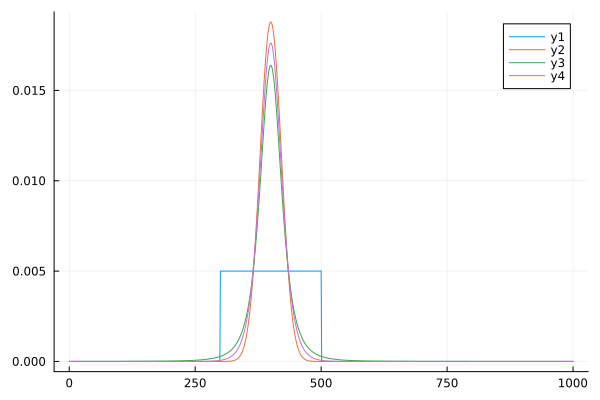

In [28]:
plot(trange,[rec,gaus,lorent,sec])

In [29]:
println(sum(rec))
println(sum(gaus))
println(sum(lorent))
println(sum(sec))

1.005
1.0
0.9997513998616844
0.9999999999994555
